为了将面向对象的绘图库包装成只使用函数的调用接口，pyplot模块的内部保存了当前图表以及当前子图等信息。当前的图表和子图可以使用`plt.gcf()`和`plt.gca()`获得，分别表示 `Get Current Figure` 和 `Get Current Axes`
> `plt.plot()`实际上会通过`plt.gca()`获得当前的`Axes`对象`ax`，然后再调用`ax.plot()`方法实现真正的绘图  

`matplotlib` 将这些缺省配置保存在一个名为 `matplotlibrc` 的配置文件中，通过修改配置文件，我们可以修改图表的缺省样式。配置文件的读入可以使用`rc_params()`，它返回一个配置字典；在`matplotlib`模块载入时会调用`rc_params()`，并把得到的配置字典保存到`rcParams`变量中；`matplotlib`将使用`rcParams`字典中的配置进行绘图；用户可以直接修改此字典中的配置，所做的改变会反映到此后创建的绘图元素

`Matplotlib` 里的常用类的包含关系为 `Figure` -> `Axes` -> `(Line2D, Text, etc.)` 一个`Figure`对象可以包含多个子图`(Axes)`，在`matplotlib`中用`Axes`对象表示一个绘图区域，可以理解为子图

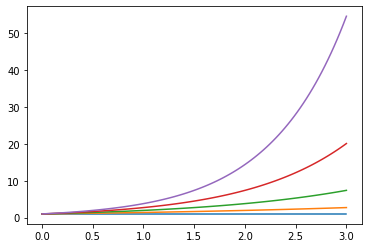

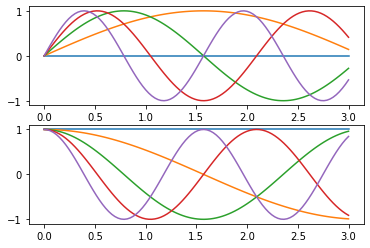

In [15]:
# 如果需要同时绘制多幅图表，可以给figure()传递一个整数参数指定Figure对象的序号
# 如果序号所指定的Figure对象已经存在，将不创建新的对象，而只是让它成为当前的Figure对象

import numpy as np
import matplotlib.pyplot as plt
 
plt.figure(1)               # 创建图表 1
plt.figure(2)               # 创建图表 2
ax1 = plt.subplot(211)      # 在图表 2中创建子图 1
ax2 = plt.subplot(212)      # 在图表 2中创建子图 2
 
x = np.linspace(0, 3, 100)
for i in range(5):
    plt.figure(1)                 # 选择图表 1
    plt.plot(x, np.exp(i*x/3))
    plt.sca(ax1)                  # 选择图表 2的子图 1   # sca -> Set the current Axes instance to ax.
    plt.plot(x, np.sin(i*x))
    plt.sca(ax2)                  # 选择图表 2的子图 2
    plt.plot(x, np.cos(i*x))
 
plt.show()

[Plots with different scales](https://matplotlib.org/gallery/subplots_axes_and_figures/two_scales.html)
> Two plots on the same axes with different left and right scales

```python
matplotlib.axes.Axes.twinx()    # 共用`x`轴，两个独立`y`轴
matplotlib.axes.Axes.twiny()    # 共用`y`轴，两个独立`x`轴
```

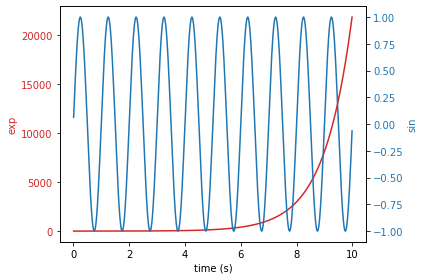

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create some mock data
t = np.arange(0.01, 10.0, 0.01)
data1 = np.exp(t)
data2 = np.sin(2 * np.pi * t)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('exp', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

[Specified Ticks](https://matplotlib.org/gallery/pyplots/dollar_ticks.html#sphx-glr-gallery-pyplots-dollar-ticks-py)

> Use a FormatStrFormatter to prepend dollar signs on x/y axis labels.

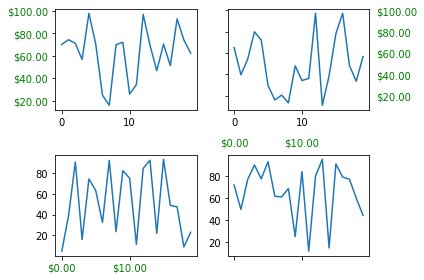

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


formatter = ticker.FormatStrFormatter('$%1.2f')

# Fixing random state for reproducibility
np.random.seed(19680801)

ax1 = plt.subplot(221)
ax1.plot(100*np.random.rand(20))
ax1.yaxis.set_major_formatter(formatter)
for tick in ax1.yaxis.get_major_ticks():
    tick.label1.set_visible(True)
    tick.label1.set_color('green')
    tick.label2.set_visible(False)

ax2 = plt.subplot(222)
ax2.plot(100*np.random.rand(20))
ax2.yaxis.set_major_formatter(formatter)
for tick in ax2.yaxis.get_major_ticks():
    tick.label1.set_visible(False)
    tick.label2.set_visible(True)
    tick.label2.set_color('green')

ax3 = plt.subplot(223)
ax3.plot(100*np.random.rand(20))
ax3.xaxis.set_major_formatter(formatter)
for tick in ax3.xaxis.get_major_ticks():
    tick.label1.set_visible(True)
    tick.label1.set_color('green')
    tick.label2.set_visible(False)

ax4 = plt.subplot(224)
ax4.plot(100*np.random.rand(20))
ax4.xaxis.set_major_formatter(formatter)
for tick in ax4.xaxis.get_major_ticks():
    tick.label1.set_visible(False)
    tick.label2.set_visible(True)
    tick.label2.set_color('green')

# 调整每隔子图之间的距离
plt.tight_layout()
plt.show()

[Zooming in and out](https://matplotlib.org/gallery/subplots_axes_and_figures/axes_margins.html#sphx-glr-gallery-subplots-axes-and-figures-axes-margins-py)

> zoom in and out of a plot using margins instead of set_xlim and set_ylim

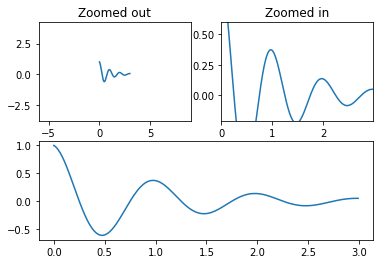

In [13]:
import numpy as np
import matplotlib.pyplot as plt


def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)


t1 = np.arange(0.0, 3.0, 0.01)

ax1 = plt.subplot(212)
ax1.margins(0.05)           # Default margin is 0.05, value 0 means fit
ax1.plot(t1, f(t1))

ax2 = plt.subplot(221)
ax2.margins(2, 2)           # Values >0.0 zoom out
ax2.plot(t1, f(t1))
ax2.set_title('Zoomed out')

ax3 = plt.subplot(222)
ax3.margins(x=0, y=-0.25)   # Values in (-0.5, 0.0) zooms in to center
ax3.plot(t1, f(t1))
ax3.set_title('Zoomed in')

plt.show()

`subplots_adjust`  -- Adjusting the spacing of margins and subplots

```python
matplotlib.pyplot.subplots_adjust(*args, **kwargs)
subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)

left  = 0.125  # 子图(subplot)距画板(figure)左边的距离
right = 0.9    # 右边
bottom = 0.1   # 底部
top = 0.9      # 顶部
wspace = 0.2   # 子图水平间距
hspace = 0.2   # 子图垂直间距
```

`pyplot` 有两个重要概念: `current figure`, `current axes`  
所有的 `plot` 命令都会应用到 `current axes`  

`plt.gca()`: 返回当前axes(matplotlib.axes.Axes)  
`plt.gcf()`: 返回当前figure(matplotlib.figure.Figure)  
`plt.clf()`: 清理当前figure  
`plt.cla()`: 清理当前axes   
`plt.close()`: 一副figure知道显示的调用close()时才会释放她所占用的资源  

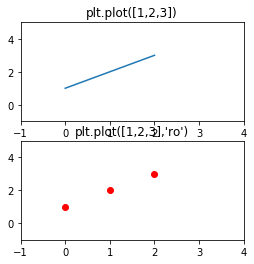

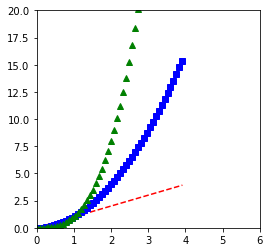

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# 创建第一个画布
plt.figure(1, figsize=(4,4))
plt.subplot(211)

# axis()指定坐标轴的取值范围 [xmin, xmax, ymin, ymax], 注意传入的是一个列表即: axis([])
plt.axis([-1, 4, -1, 5])
# 只传入一个参数的话, 默认为y轴, x轴默认为range(n)
plt.plot([1,2,3])
plt.title("plt.plot([1,2,3])")

# ro 表示点的颜色和形状, 默认为 'b-'
plt.subplot(212)
plt.axis([-1, 4, -1, 5])
plt.plot([1,2,3], 'ro')
plt.title("plt.plot([1,2,3],'ro')")


# 创建第二个画布
plt.figure(2, figsize=(4,4))

# 指定坐标轴的取值范围
plt.axis([0, 6, 0, 20])
x = np.arange(0, 4, 0.08)

# plot可以一步画出多条线,不过没法设置其他的line properties
# 一次画三条折线 (共用x, y轴)
plt.plot(x,x,'r--',   x,np.power(x,2),'bs',  x,np.power(x,3),'g^')


# 会显示两块画布
plt.show()  

给axes添加文本说明

+ plt.text()可以在任意位置添加文本, 而plt.xlabel(), plt.ylabel, plt.title()是将文本放在指定位置
+ plt.text(x, y, s[, fontsize, color]): 在坐标(x,y)显示文本s ,fontsize指定字体大小

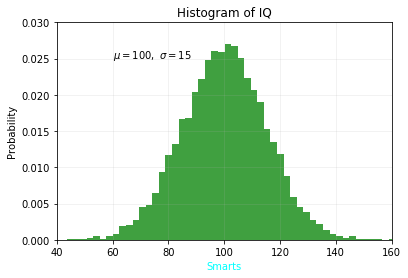

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
# np.random.randn 这个函数的作用就是从标准正态分布中返回一个或多个样本值
np.random.seed(20170617)

mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)
p, bins, patches = plt.hist(x, 50, density=True, facecolor='g', alpha=0.75)

plt.xlabel('Smarts', color='cyan')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(alpha=0.2) # 显示网格
plt.show()

pyplot.subplots_adjust()

```python
plt.subplots_adjust(bottom=0.08, top=0.92, left=0.10, right=0.95, hspace=0.25, wspace=0.35)

一幅图称为figure, 其绘画区域称为axes:
bottom, top: 即 axes距离画板底部的距离 (画板的高度取1)
left, right: 即 axes距离画板左边的距离 (画板的宽度取1)
hspace: hight space 上下axes的距离
wspace: width space 左右axse的距离

注: bottom, top, left, right 不管figure实际长度和宽度为多少,都会归一化为1,这里填的数值,更确切的说是`占的比例` 
```

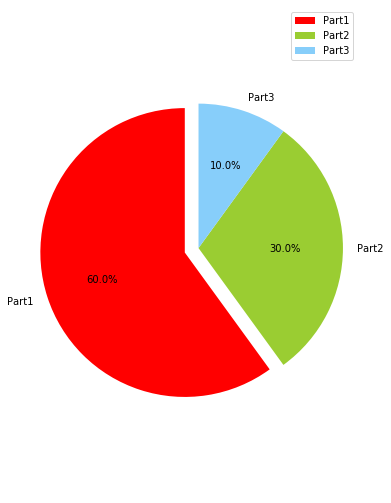

In [22]:
from matplotlib import pyplot as plt 
import numpy as np

#调节图形大小，宽，高
plt.figure(figsize=(6,9))
#定义饼状图的标签，标签是列表
labels = ['Part1', 'Part2', 'Part3']
#每个标签占多大，会自动去算百分比
sizes = [60,30,10]
colors = ['red','yellowgreen','lightskyblue']
#将某部分爆炸出来， 使用括号，将第一块分割出来，数值的大小是分割出来的与其他两块的间隙
# explode = (0.05,0,0)

# 将值最大的部分爆炸出去
explode = [0 for i in range(len(sizes))]
explode[np.argmax(sizes)] = 0.1

patches,l_text,p_text = plt.pie(sizes,explode=explode,labels=labels,colors=colors,
                                labeldistance = 1.1,autopct = '%3.1f%%',shadow = False,
                                startangle = 90,pctdistance = 0.6)

# labeldistance，文本的位置离原点有多远，1.1指1.1倍半径的位置
# autopct，圆里面的文本格式，%3.1f%%表示小数有三位，整数有一位的浮点数
# shadow，饼是否有阴影
# startangle，起始角度，0，表示从0开始逆时针转，为第一块。一般选择从90度开始比较好看
# pctdistance，百分比的text离圆心的距离
# patches, l_texts, p_texts，为了得到饼图的返回值，p_texts饼图内部文本的，l_texts饼图外label的文本

#改变文本的大小
#方法是把每一个text遍历。调用set_size方法设置它的属性
for t in l_text:           # l_texts饼图外label的文本
    t.set_size=(30)
for t in p_text:           # p_texts饼图内部文本的
    t.set_size=(20)
# 设置x，y轴刻度一致，这样饼图才能是圆的
plt.axis('equal')
plt.legend()
plt.show()